# Classificador de acórdãos a partir da jurisprudência do TCE/PI com ULMFiT
Usando tcepi_decisoes_ate_10_2020.csv, que contém dados de boletins até outubro de 2020 somente para o classificador. Para ajuste fino do modelo, foi utilizado tce_ementas_de_decisoes.csv, que contem as ementas extraidas dos acórdãos e pareceres previos.

### Configuração
- **Architecture 4 QRNN with 1550 hidden parameters by layer, SentencePiece tokenizer (15 000 tokens)**
- **Hyperparameters and training method from the MultiFiT paper**

### Versões das bibliotecas utilizadas:
- fastai - 1.0.61
- Pytorch - 1.4.0
- Sentencepiece - 0.1.91

## Introdução
Os modelos foram treinados utilizando o método ULMFiT, através do framework [fastai](https://docs.fast.ai/) (Deep Learning library on PyTorch) na versão 1.0.61.<br>
As fases da ULMFiT:<br>
<img src="https://drive.google.com/uc?id=1iZqwBO9SJKtfkxM5-wfgoBHVekJcbd3X">

Foram utilizadas as seguintes fontes de dados para cada uma das fases:

1.   **Laguange Model**: utilizado o [modelo de linguagem](https://github.com/piegu/language-models/blob/master/lm3-portuguese.ipynb) criado a partir de 100Mi de tokens extraídos dos artigos em português da Wikipedia por [Pierre Guillou](https://www.linkedin.com/in/pierreguillou);
2.   **Ajuste fino do language model** realizado com as ementas dos acórdos e pareceres prévios do TCE/PI extraídos do sistema de processo eletrônico;
3.   **Classificador** treindo com as ementas extraídas dos boletins de jurisprudência do TCE cujos datases estão disponibilizados na pasta *data*.

### Hyperparameters values

- Language Model
    - (batch size) bs = 50
    - (QRNN) 4 QRNN (default: 3) with 1550 hidden parameters each one (default: 1152)
    - (SentencePiece) vocab of 15000 tokens
    - (dropout) mult_drop = 1.0
    - (weight decay) wd = 0.1
    - (number of training epochs) 20 epochs
    - (learning rate) modified version of 1-cycle learning rate schedule (Smith, 2018) that uses cosine instead of linear annealing, cyclical momentum and discriminative finetuning
    - (loss) FlattenedLoss of weighted LabelSmoothingCrossEntropy
    

- Text Classifier
    - (batch size) bs = 18
    - (SentencePiece) vocab of 15000 tokens
    - (dropout) mult_drop = 0.2
    - (weight decay) wd = 0.1
    - (number of training epochs) 14 epochs (forward) and 19 epochs (backward)
    - (learning rate) modified version of 1-cycle learning rate schedule (Smith, 2018) that uses cosine instead of linear annealing, cyclical momentum and discriminative finetuning
    - (loss) FlattenedLoss of weighted LabelSmoothingCrossEntropy


OBS:
*   Foi utilizado o Google Colab por possuir GPU
*   Dados armazenados no Google Drive nas pasta */My Drive/Colab Notebooks/classifica_acordaos*
* Baseado no trabalho de [Pierre Guillou](https://www.linkedin.com/in/pierreguillou), a partir [de post no medium](https://medium.com/@pierre_guillou/nlp-fastai-portuguese-language-model-980c8ec75362)

## Resultados:
**Sobre os dados**: o conjunto de dados da jurisprudência do TCE/PI está desequilibrado. Portanto, usamos uma função de perda ponderada (FlattenedLoss de Weighted LabelSmoothingCrossEntropy).

  - Número de textos: 652, assim distribuidos:

| Classe              | Qtde. |
|---------------------|------:|
| LICITACAO           |   122 |
| PESSOAL             |   118 |
| OUTROS              |   106 |
| DESPESA             |    65 |
| PROCESSUAL          |    62 |
| PRESTACAO DE CONTAS |    46 |
| CONTRATO            |    43 |
| PREVIDENCIA         |    35 |
| AGENTE POLITICO     |    31 |
| RESPONSABILIDADE    |    24 |

- **(fine-tuned) Language Model**   
    - forward : (accuracy) **73,83%** | (perplexity) 3.41
    - backward: (accuracy) **74,54%** | (perplexity) 3.62

- **(fine-tuned) Text Classifier**
    - **Accuracy** (ensemble) **68,46%**
    - **f1 score** (ensemble): **66,21**


Autor: Antonio Filho<br>
Data: em 06 de novembro de 2020.<br>
Conclusão em 17 de novembro.

## Startup

In [1]:
# fastai
!pip install fastai==1.0.61

# Pytorch
!pip install torch==1.4.0

# Sentencepiece (fastai tokenizer)
!pip install sentencepiece==0.1.91

     |████████████████████████████████| 753.4MB 20kB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
     |████████████████████████████████| 1.1MB 8.8MB/s 


In [2]:
#ninja
!pip install ninja

     |████████████████████████████████| 112kB 8.6MB/s 


In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.text import *
from fastai.callbacks import *

import matplotlib.cm as cm

from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score

In [4]:
!python -m fastai.utils.show_install



```text
=== Software === 
python        : 3.6.9
fastai        : 1.0.61
fastprogress  : 0.2.7
torch         : 1.4.0
nvidia driver : 418.67
torch cuda    : 10.1 / is available
torch cudnn   : 7603 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 15079MB | Tesla T4

=== Environment === 
platform      : Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
distro        : #1 SMP Thu Jul 23 08:00:38 PDT 2020
conda env     : Unknown
python        : /usr/bin/python3
sys.path      : 
/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be installed with:
pip install distro
Once installed, re-run this utility to get t

In [5]:
#bs=50
bs = 64   # batch size works for Kaggle Kernels/colab

In [6]:
#hide
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

device

device(type='cuda')

In [7]:
torch.cuda.set_device(0)

### Configuração do Google Drive

In [8]:
# Montar drive do Google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
Config.DEFAULT_CONFIG = {
        'data_path': '/content/drive/My Drive/Colab Notebooks/classifica_acordaos/fastai/data',
        'model_path': '/content/drive/My Drive/Colab Notebooks/classifica_acordaos/fastai/models'
    }

Config.create('/content/drive/My Drive/Colab Notebooks/classifica_acordaos/myconfig.yml')
Config.DEFAULT_CONFIG_PATH = '/content/drive/My Drive/Colab Notebooks/classifica_acordaos/myconfig.yml'

path = Path("/content/drive/My Drive/Colab Notebooks/classifica_acordaos/")
data_path = Config.data_path()

In [10]:
print(data_path); print(path)

/content/drive/My Drive/Colab Notebooks/classifica_acordaos/fastai/data
/content/drive/My Drive/Colab Notebooks/classifica_acordaos


This will create a `{lang}wiki` folder, containing a `{lang}wiki` text file with the wikipedia contents. (For other languages, replace `{lang}` with the appropriate code from the [list of wikipedias](https://meta.wikimedia.org/wiki/List_of_Wikipedias).)

In [11]:
lang = 'pt'

In [12]:
name = f'{lang}wiki'
path = data_path/name
path.mkdir(exist_ok=True, parents=True)

lm_fns3 = [f'{lang}_wt_sp15_multifit', f'{lang}_wt_vocab_sp15_multifit']
lm_fns3_bwd = [f'{lang}_wt_sp15_multifit_bwd', f'{lang}_wt_vocab_sp15_multifit_bwd']

In [13]:
from sklearn.metrics import f1_score

@np_func
def f1(inp,targ): return f1_score(targ, np.argmax(inp, axis=-1), average='weighted')

In [14]:
# source: https://github.com/fastai/fastai/blob/master//fastai/layers.py#L300:7
# blog: https://bfarzin.github.io/Label-Smoothing/
class WeightedLabelSmoothingCrossEntropy(nn.Module):
    def __init__(self, weight, eps:float=0.1, reduction='mean'):
        super().__init__()
        self.weight,self.eps,self.reduction = weight,eps,reduction
        
    def forward(self, output, target):
        c = output.size()[-1]
        log_preds = F.log_softmax(output, dim=-1)
        if self.reduction=='sum': loss = -log_preds.sum()
        else:
            loss = -log_preds.sum(dim=-1)
            if self.reduction=='mean':  loss = loss.mean()
        return loss*self.eps/c + (1-self.eps) * F.nll_loss(log_preds, target, weight=self.weight, reduction=self.reduction)

In [15]:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "on

## Fine-tuning "forward LM"

### Dados para ajuste fino do modelo

In [16]:
data_path

PosixPath('/content/drive/My Drive/Colab Notebooks/classifica_acordaos/fastai/data')

In [17]:
path_data = data_path

# Load csv
#df_model = pd.read_csv(path_data/'tcepi_decisoes_model.csv', sep=';')
#df_teste = pd.read_csv(path_data/'tcepi_decisoes_test.csv', sep=';')
#df_model = pd.read_csv(data_path/'tcepi_decisoes_ate_10_2020.csv', sep=';')
df_lm = pd.read_csv(data_path/'tce_ementas_de_decisoes.csv', sep=';')

#df_trn_val = df_model[['ementa', 'assunto_agrupado']]

# columns names
reviews = "ementa"
label = "assunto_agrupado"

In [18]:
df_lm.shape

(18921, 2)

In [19]:
df_lm.head()

,ementa,ementa_limpa
0,Denúncia contra a Prefeitura Municipal de\nCal...,denuncia contra prefeitura municipal caldeirao...
1,EMENTA: APOSENTADORIA VOLUNTÁRIA POR\nIDADE E ...,aposentadoria voluntaria por idade tempo contr...
2,EMENTA: RECURSO DE RECONSIDERAÇÃO. FALHAS QUE\...,recurso reconsideracao falhas que nao ensejam ...
3,EMENTA. INSPEÇÃO ORDINÁRIA. VERIFICAÇÃO DE\nRE...,inspecao ordinaria verificacao regularidade pr...
4,"Denúncia contra FUESPI. Unânime, concordando\n...",denuncia contra fuespi unanime concordando par...


In [20]:
# number of reviews
print(f'(orginal csv) number of all reviews: {len(df_lm)}')

# keep not null reviews
## delete nan reviews
empty_nan = (df_lm['ementa'].isnull()).sum()
df_lm = df_lm[df_lm['ementa'].notnull()]
## delete empty reviews
list_idx_none = []
for idxs, row in df_lm.iterrows():
    if row[reviews].strip() == "":
        df_lm.drop(idxs, axis=0, inplace=True)
        list_idx_none.append(idxs)
empty_none = len(list_idx_none)
## print results
empty = empty_nan+empty_none
if empty != 0:
    print(f'{empty} empty reviews were deleted')
else:
    print('there is no empty review.')


(orginal csv) number of all reviews: 18921
62 empty reviews were deleted


In [21]:
path

PosixPath('/content/drive/My Drive/Colab Notebooks/classifica_acordaos/fastai/data/ptwiki')

In [22]:
dest = path/'corpus2_100'
(dest/'tmp').ls()

[PosixPath('/content/drive/My Drive/Colab Notebooks/classifica_acordaos/fastai/data/ptwiki/corpus2_100/tmp/spm.model'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/classifica_acordaos/fastai/data/ptwiki/corpus2_100/tmp/spm.vocab')]

In [23]:
dest

PosixPath('/content/drive/My Drive/Colab Notebooks/classifica_acordaos/fastai/data/ptwiki/corpus2_100')

### Databunch

In [24]:
%%time
data_lm = (TextList.from_df(df_lm, path, cols=reviews, processor=SPProcessor.load(dest))
    .split_by_rand_pct(0.2, seed=42)
    .label_for_lm()           
    .databunch(bs=bs, num_workers=1))

CPU times: user 2.29 s, sys: 126 ms, total: 2.41 s
Wall time: 4.56 s


In [ ]:
data_lm.save(f'{path}/{lang}_databunch_lm_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

### Training

In [ ]:
data_lm = load_data(path, f'{lang}_databunch_lm_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2', bs=bs)

In [25]:
config = awd_lstm_lm_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [26]:
%%time
perplexity = Perplexity()
learn_lm = language_model_learner(data_lm, AWD_LSTM, config=config, pretrained_fnames=lm_fns3, drop_mult=1., 
                                  metrics=[error_rate, accuracy, perplexity]).to_fp16()

CPU times: user 4.05 s, sys: 1.45 s, total: 5.5 s
Wall time: 1min 8s


In [27]:
# number of model parameters
sum([p.numel() for p in learn_lm.model.parameters()])

46020150

In [28]:
learn_lm.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(15000, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(15000, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): QRNN(
        (layers): ModuleList(
          (0): QRNNLayer(
            (linear): WeightDropout(
              (module): Linear(in_features=800, out_features=4650, bias=True)
            )
          )
        )
      )
      (1): QRNN(
        (layers): ModuleList(
          (0): QRNNLayer(
            (linear): WeightDropout(
              (module): Linear(in_features=1550, out_features=4650, bias=True)
            )
          )
        )
      )
      (2): QRNN(
        (layers): ModuleList(
          (0): QRNNLayer(
            (linear): WeightDropout(
              (module): Linear(in_features=1550, out_features=4650, bias=True)
            )
          )
        )
      )
      (3): QRNN(
        (layers): ModuleList(
          (0): QRNNLayer(
            (linear): WeightD

#### Change loss function

In [29]:
learn_lm.loss_func

FlattenedLoss of CrossEntropyLoss()

In [30]:
learn_lm.loss_func = FlattenedLoss(LabelSmoothingCrossEntropy)

In [31]:
learn_lm.loss_func

FlattenedLoss of LabelSmoothingCrossEntropy()

#### Training

In [32]:
learn_lm.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 8.32E-02
Min loss divided by 10: 6.31E-02


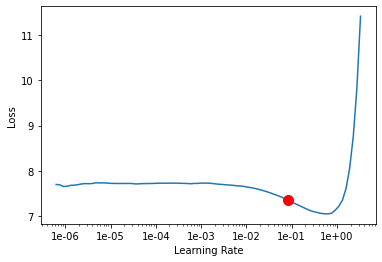

In [33]:
learn_lm.recorder.plot(suggestion=True)

In [34]:
lr = 2e-2
lr *= bs/48

wd = 0.1

In [ ]:
learn_lm.fit_one_cycle(2, lr*10, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,12.650836,7.238255,0.868331,0.131669,553.615356,00:33
1,5.107764,4.701796,0.638495,0.361505,45.696251,00:33


In [ ]:
learn_lm.save(f'{lang}fine_tuned1_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')
learn_lm.save_encoder(f'{lang}fine_tuned1_enc_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,3.827243,3.514403,0.470117,0.529883,12.261751,00:44
1,3.150555,2.940914,0.379271,0.620729,6.667614,00:44
2,2.960787,2.807663,0.354726,0.645274,5.705032,00:44
3,3.000472,2.837949,0.356481,0.643519,5.743314,00:44
4,3.029747,2.850721,0.360221,0.639779,5.855797,00:44
5,2.989197,2.828092,0.357413,0.642587,5.703299,00:44
6,2.954739,2.790118,0.348961,0.651039,5.530514,00:44
7,2.901024,2.757504,0.342019,0.657981,5.162446,00:44
8,2.837116,2.712097,0.335814,0.664187,4.997771,00:44
9,2.794699,2.657774,0.324903,0.675096,4.786609,00:44


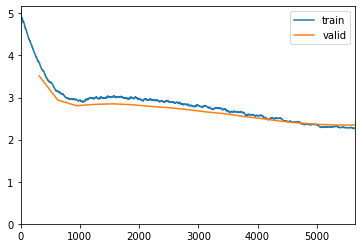

In [ ]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(18, lr, wd=wd, moms=(0.8,0.7), callbacks=[ShowGraph(learn_lm)])

In [ ]:
#learn_lm.save(f'{lang}fine_tuned2_lenerbr_sp15_multifit_v2')
#learn_lm.save_encoder(f'{lang}fine_tuned2_enc_lenerbr_sp15_multifit_v2')

Save best LM learner and its encoder

In [ ]:
learn_lm.save(f'{lang}fine_tuned_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')
learn_lm.save_encoder(f'{lang}fine_tuned_enc_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

## Fine-tuning "backward LM"

### Databunch

In [ ]:
%%time
data_lm = (TextList.from_df(df_lm, path, cols=reviews, processor=SPProcessor.load(dest))
    .split_by_rand_pct(0.2, seed=42)
    .label_for_lm()           
    .databunch(bs=bs, num_workers=1, backwards=True))

CPU times: user 2.14 s, sys: 182 ms, total: 2.32 s
Wall time: 3.85 s


In [ ]:
data_lm.save(f'{path}/{lang}_databunch_lm_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

### Training

In [ ]:
%%time
data_lm = load_data(path, f'{lang}_databunch_lm_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2', bs=bs, backwards=True)

CPU times: user 153 ms, sys: 8.7 ms, total: 162 ms
Wall time: 175 ms


In [ ]:
config = awd_lstm_lm_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [ ]:
%%time
perplexity = Perplexity()
learn_lm = language_model_learner(data_lm, AWD_LSTM, config=config, pretrained_fnames=lm_fns3_bwd, drop_mult=1., 
                                  metrics=[error_rate, accuracy, perplexity]).to_fp16()

CPU times: user 599 ms, sys: 121 ms, total: 719 ms
Wall time: 3.08 s


#### Change loss function

In [ ]:
learn_lm.loss_func

FlattenedLoss of CrossEntropyLoss()

In [ ]:
learn_lm.loss_func = FlattenedLoss(LabelSmoothingCrossEntropy)

In [ ]:
learn_lm.loss_func

FlattenedLoss of LabelSmoothingCrossEntropy()

#### Training

In [ ]:
learn_lm.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


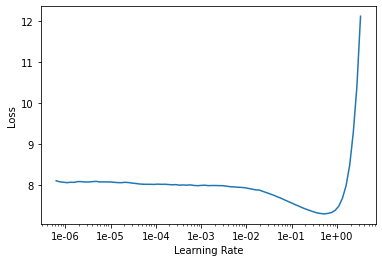

In [ ]:
learn_lm.recorder.plot()

In [ ]:
lr = 2e-2
lr *= bs/48

wd = 0.1

In [ ]:
learn_lm.fit_one_cycle(2, lr*10, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,15.327642,7.279349,0.887908,0.112092,794.770874,00:34
1,5.769167,5.490209,0.764721,0.235279,118.467041,00:34


In [ ]:
learn_lm.save(f'{lang}fine_tuned1_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')
learn_lm.save_encoder(f'{lang}fine_tuned1_enc_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

epoch,train_loss,valid_loss,error_rate,accuracy,perplexity,time
0,4.289517,3.894290,0.499173,0.500827,19.182375,00:44
1,3.303151,3.104027,0.384397,0.615603,7.972410,00:44
2,3.014955,2.865279,0.342218,0.657782,5.985470,00:44
3,3.007538,2.904049,0.346448,0.653552,6.135276,00:44
4,3.082971,2.897279,0.346387,0.653613,6.319256,00:44
5,3.039827,2.877209,0.341600,0.658400,6.075020,00:44
6,3.056098,2.849878,0.338555,0.661444,5.943229,00:44
7,2.968282,2.802492,0.329641,0.670359,5.534186,00:44
8,2.932220,2.776056,0.323878,0.676122,5.302593,00:44
9,2.825566,2.697786,0.312946,0.687054,5.035261,00:44


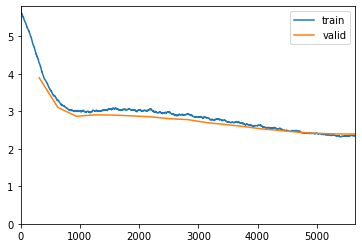

In [ ]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(18, lr, wd=wd, moms=(0.8,0.7), callbacks=[ShowGraph(learn_lm)])

In [ ]:
learn_lm.save(f'{lang}fine_tuned2_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')
learn_lm.save_encoder(f'{lang}fine_tuned2_enc_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

Save best LM learner and its encoder

In [ ]:
learn_lm.save(f'{lang}fine_tuned_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')
learn_lm.save_encoder(f'{lang}fine_tuned_enc_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

## Fine-tuning "forward Classifier"

### Dados para o classificador

In [15]:
data_path

PosixPath('/content/drive/My Drive/Colab Notebooks/classifica_acordaos/fastai/data')

In [16]:
path_data = data_path

# Load csv
df_model = pd.read_csv(path_data/'tcepi_decisoes_ate_10_2020.csv', sep=';')

df_trn_val = df_model[['ementa', 'assunto_agrupado']]

# columns names
reviews = "ementa"
label = "assunto_agrupado"

In [19]:
df_trn_val.shape

(652, 2)

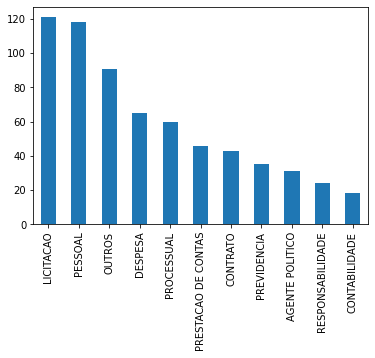

In [20]:
df_trn_val.assunto_agrupado.value_counts().plot(kind='bar')

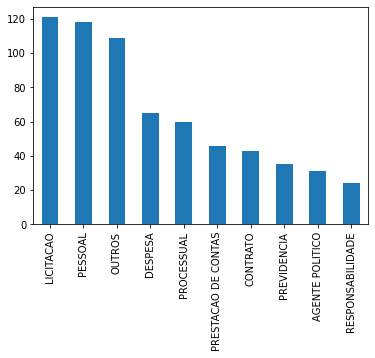

In [21]:
df_trn_val['assunto_agrupado'] = df_trn_val.assunto_agrupado.apply(lambda x: x if x != 'CONTABILIDADE' else 'OUTROS')
df_trn_val.assunto_agrupado.value_counts().plot(kind='bar')

### Databunch

In [22]:
bs = 18

In [23]:
%%time
data_lm = load_data(path, f'{lang}_databunch_lm_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2', bs=bs)

CPU times: user 133 ms, sys: 36.1 ms, total: 169 ms
Wall time: 717 ms


In [27]:
%%time
data_clas = (TextList.from_df(df_trn_val, path, vocab=data_lm.vocab, cols=reviews, processor=SPProcessor.load(dest))
    .split_by_rand_pct(0.2, seed=42)
    .label_from_df(cols=label)
    .databunch(bs=bs, num_workers=1))

CPU times: user 239 ms, sys: 52.9 ms, total: 292 ms
Wall time: 1.4 s


In [ ]:
%%time
data_clas.save(f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

CPU times: user 22.4 ms, sys: 4.67 ms, total: 27 ms
Wall time: 33.2 ms


### Get weights to penalize loss function of the majority class

In [ ]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2', bs=bs, num_workers=1)

CPU times: user 48.2 ms, sys: 1.04 ms, total: 49.2 ms
Wall time: 50.7 ms


In [28]:
num_trn = len(data_clas.train_ds.x)
num_val = len(data_clas.valid_ds.x)
num_trn, num_val, num_trn+num_val

(522, 130, 652)

In [29]:
trn_LabelCounts = np.unique(data_clas.train_ds.y.items, return_counts=True)[1]
val_LabelCounts = np.unique(data_clas.valid_ds.y.items, return_counts=True)[1]
trn_LabelCounts, val_LabelCounts

(array([ 20,  33,  53, 102,  83, 101,  38,  27,  46,  19]),
 array([11, 10, 12, 19, 26, 17,  8,  8, 14,  5]))

In [30]:
trn_weights = [1 - count/num_trn for count in trn_LabelCounts]
val_weights = [1 - count/num_val for count in val_LabelCounts]
trn_weights, val_weights

([0.9616858237547893,
  0.9367816091954023,
  0.8984674329501916,
  0.8045977011494253,
  0.8409961685823755,
  0.8065134099616859,
  0.9272030651340997,
  0.9482758620689655,
  0.9118773946360154,
  0.9636015325670498],
 [0.9153846153846154,
  0.9230769230769231,
  0.9076923076923077,
  0.8538461538461538,
  0.8,
  0.8692307692307693,
  0.9384615384615385,
  0.9384615384615385,
  0.8923076923076922,
  0.9615384615384616])

### Training (Loss = FlattenedLoss of weighted LabelSmoothingCrossEntropy)

In [ ]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2', bs=bs, num_workers=1)

CPU times: user 50.2 ms, sys: 500 µs, total: 50.7 ms
Wall time: 53.1 ms


In [31]:
config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152 --> Testar com 2000
config['n_layers'] = 4 #default 3    --> Testar com 20

In [50]:
learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config, pretrained=False, drop_mult=0.2, 
                                  metrics=[accuracy,f1]).to_fp16()
learn_c.load_encoder(f'{lang}fine_tuned_enc_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2');

#### Change loss function

In [51]:
learn_c.loss_func

FlattenedLoss of CrossEntropyLoss()

In [52]:
loss_weights = torch.FloatTensor(trn_weights).cuda()
learn_c.loss_func = FlattenedLoss(WeightedLabelSmoothingCrossEntropy, weight=loss_weights)

In [53]:
learn_c.loss_func

FlattenedLoss of WeightedLabelSmoothingCrossEntropy()

#### Training

In [54]:
learn_c.freeze()

In [55]:
learn_c.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


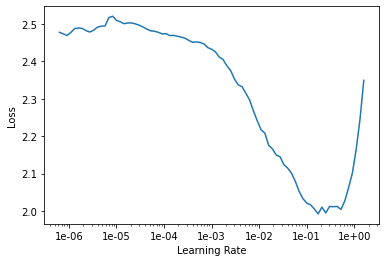

In [56]:
learn_c.recorder.plot()

In [57]:
lr = 2e-1
lr *= bs/48

wd = 0.1

In [58]:
learn_c.fit_one_cycle(2, lr, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,1.985497,1.862119,0.384615,0.357481,00:03
1,1.598527,1.515947,0.576923,0.555939,00:03


In [ ]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

In [59]:
learn_c.fit_one_cycle(2, lr, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,1.474492,1.722021,0.492308,0.451513,00:03
1,1.331903,1.511681,0.538462,0.509634,00:03


In [ ]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

In [60]:
learn_c.freeze_to(-2)
learn_c.fit_one_cycle(2, slice(lr/(2.6**4),lr), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,1.396873,1.801918,0.553846,0.539962,00:03
1,1.220247,1.363289,0.661538,0.630861,00:03


In [61]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

In [62]:
learn_c.freeze_to(-3)
learn_c.fit_one_cycle(2, slice(lr/2/(2.6**4),lr/2), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.871866,1.619481,0.584615,0.574204,00:03
1,0.824421,1.412766,0.661538,0.659606,00:03


In [63]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

In [48]:
learn_c.load(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2', purge=False);

In [64]:
learn_c.unfreeze()
learn_c.fit_one_cycle(4, slice(lr/10/(2.6**4),lr/10), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.660265,1.391675,0.669231,0.673175,00:06
1,0.628666,1.385691,0.638462,0.624624,00:06
2,0.599476,1.338287,0.669231,0.671340,00:06
3,0.581113,1.336400,0.669231,0.666340,00:06


3	0.593976	1.407004	0.615385	0.590921	00:03

In [65]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

In [ ]:
#learn_c.load(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')
#learn_c.fit_one_cycle(4, slice(lr/100/(2.6**4),lr/100), wd=wd, moms=(0.8,0.7))

In [ ]:
#learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

In [ ]:
#learn_c.load(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')
#learn_c.fit_one_cycle(2, slice(lr/1000/(2.6**4),lr/1000), wd=wd, moms=(0.8,0.7))

In [ ]:
#learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2')

### Confusion matrix

In [66]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2', bs=bs, num_workers=1);

config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config)

CPU times: user 477 ms, sys: 176 ms, total: 653 ms
Wall time: 4.57 s


In [67]:
learn_c.load(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2', purge=False);

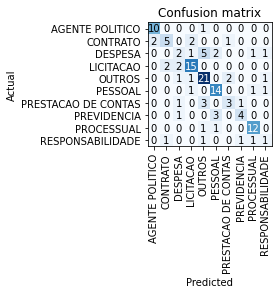

In [68]:
preds,y,losses = learn_c.get_preds(with_loss=True)
predictions = np.argmax(preds, axis = 1)

interp = ClassificationInterpretation(learn_c, preds, y, losses)
interp.plot_confusion_matrix()

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.array(y), np.array(predictions))
print(cm)

## acc
#print(f'accuracy global: {(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9]+cm[10,10])/(cm.sum())}')
print(f'accuracy global: {(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9])/(cm.sum())}')

# acc neg, acc pos
print(f'accuracy on class 0: {cm[0,0]/(cm.sum(1)[0])*100}') 
print(f'accuracy on class 1: {cm[1,1]/(cm.sum(1)[1])*100}')
print(f'accuracy on class 2: {cm[2,2]/(cm.sum(1)[2])*100}')
print(f'accuracy on class 3: {cm[3,3]/(cm.sum(1)[3])*100}')
print(f'accuracy on class 4: {cm[4,4]/(cm.sum(1)[4])*100}')
print(f'accuracy on class 5: {cm[5,5]/(cm.sum(1)[5])*100}')
print(f'accuracy on class 6: {cm[6,6]/(cm.sum(1)[6])*100}')
print(f'accuracy on class 7: {cm[7,7]/(cm.sum(1)[7])*100}')
print(f'accuracy on class 8: {cm[8,8]/(cm.sum(1)[8])*100}')
print(f'accuracy on class 9: {cm[9,9]/(cm.sum(1)[9])*100}')
#print(f'accuracy on class 10: {cm[10,10]/(cm.sum(1)[10])*100}')

[[10  0  0  0 ...  0  0  0  0]
 [ 2  5  0  2 ...  1  0  0  0]
 [ 0  0  2  1 ...  0  0  1  1]
 [ 0  2  2 15 ...  0  0  0  0]
 ...
 [ 0  0  1  0 ...  3  1  0  0]
 [ 0  0  1  0 ...  0  4  0  0]
 [ 0  0  0  0 ...  0  0 12  0]
 [ 0  1  0  0 ...  0  1  1  1]]
accuracy global: 0.6692307692307692
accuracy on class 0: 90.9090909090909
accuracy on class 1: 50.0
accuracy on class 2: 16.666666666666664
accuracy on class 3: 78.94736842105263
accuracy on class 4: 80.76923076923077
accuracy on class 5: 82.35294117647058
accuracy on class 6: 37.5
accuracy on class 7: 50.0
accuracy on class 8: 85.71428571428571
accuracy on class 9: 20.0


In [70]:
learn_c.show_results()

text,target,prediction
▁xxbos ▁xxup ▁em bar gos ▁xxup ▁de ▁xxup ▁declaração . ▁xxup ▁proposta ▁xxup ▁de ▁xxup ▁elaboração ▁xxup ▁de ▁xxup ▁decisão ▁xxup ▁norma tiva . ▁xxup ▁pedido ▁xxup ▁de ▁xxup ▁uni form ização ▁xxup ▁de ▁xxup ▁ juri sp ru dência . ▁xxup ▁rea just e ▁xxup ▁dos ▁xxup ▁sub s ídio s ▁xxup ▁de ▁xxup ▁vereadores . ▁1 ▁ - ▁o ▁sub s ídio ▁dos ▁xxmaj ▁vereadores ▁não ▁pode ▁ser,AGENTE POLITICO,AGENTE POLITICO
"▁xxbos ▁xxup ▁conta s ▁xxup ▁de ▁xxup ▁governo . ▁xxup ▁prefeitura ▁xxup ▁municipal ▁xxup ▁de ▁xxup ▁ angi cal ▁xxup ▁do ▁xxup ▁piauí ▁xxup ▁exercício ▁2017. ▁1 ▁ - ▁xxmaj ▁receita ▁municipal , ▁observou - se ▁no ▁exercício ▁um ▁ dé fici t ▁na ▁xxmaj ▁receita ▁xxmaj ▁arre cada , ▁onde ▁a ▁mesma ▁representou ▁tão ▁somente ▁ 59 , 51 % ▁da ▁xxmaj ▁receita ▁xxmaj ▁prevista , ▁fato ▁esse ▁que",OUTROS,OUTROS
▁xxbos ▁xxup ▁presta ção ▁xxup ▁de ▁xxup ▁conta s . ▁xxup ▁prefeitura ▁xxup ▁municipal ▁xxup ▁de ▁xxup ▁eles b ão ▁xxup ▁veloso . ▁xxup ▁conta s ▁xxup ▁de ▁xxup ▁gestão . ▁xxup ▁exercício ▁xxup ▁de ▁2017. ▁xxup ▁sub contra tação ▁xxup ▁total ▁xxup ▁de ▁xxup ▁contrato ▁xxup ▁de ▁xxup ▁serviços ▁xxup ▁de ▁xxup ▁transporte ▁xxup ▁escolar ▁xxup ▁sem ▁xxup ▁autorização ▁xxup ▁expressa ▁xxup ▁no ▁xxup ▁e di tal . ▁xxup,CONTRATO,CONTRATO
▁xxbos ▁xxup ▁in spe ção ▁xxup ▁na ▁xxup ▁prefeitura ▁xxup ▁municipal ▁xxup ▁de ▁xxup ▁palmeira is . ▁xxup ▁irregular idades ▁xxup ▁em ▁xxup ▁procedimento s ▁xxup ▁de ▁xxup ▁li cita ção ▁– ▁xxup ▁exercício ▁2016. ▁xxup ▁contratação ▁e ▁xxup ▁execução ▁xxup ▁de ▁xxup ▁despesas ▁xxup ▁por ▁xxup ▁empresa ▁xxup ▁fictícia . ▁xxup ▁consta tação ▁xxup ▁de ▁xxup ▁in ca pa cidade ▁xxup ▁operacional ▁xxup ▁necessária ▁a ▁xxup ▁para ▁xxup ▁realizar,CONTRATO,LICITACAO
▁xxbos ▁xxup ▁presta ção ▁xxup ▁de ▁xxup ▁conta s . ▁xxup ▁governo . ▁xxup ▁im prop riedade ▁xxup ▁verifica da ▁xxup ▁na ▁xxup ▁análise ▁xxup ▁do ▁xxup ▁planejamento ▁xxup ▁ governa mental . ▁xxup ▁in temp es tividade ▁xxup ▁documentação . ▁xxup ▁balanço ▁xxup ▁geral ▁xxup ▁enviado ▁xxup ▁fora ▁xxup ▁do ▁xxup ▁prazo . ▁xxup ▁multa s ▁xxup ▁por ▁xxup ▁atraso ▁xxup ▁na ▁xxup ▁presta ção ▁xxup ▁de ▁xxup ▁conta,OUTROS,OUTROS


### Predictions some random sentences

In [ ]:
# Get the prediction
test_text = "A medida cautelar do TCE que determina a suspensão de licitação por falhas no edital não impede o órgão ou a entidade de rever seu ato convocatório, valendo-se do poder de autotutela (art. 49 da Lei 8.666/1993 c/c o art. 9º da Lei 10.520/2002) , com o objetivo de, antecipando-se a eventual deliberação do Tribunal, promover de modo próprio a anulação da licitação e o refazimento do edital, livre dos vícios apontados."
pred = learn_c.predict(test_text)
print(pred)

(Category tensor(3), tensor(3), tensor([0.0102, 0.0208, 0.0172, 0.7543, 0.0205, 0.0406, 0.0214, 0.0541, 0.0162,
        0.0447]))


In [ ]:
# The darker the word-shading in the below example, the more it contributes to the classification. 
txt_ci = TextClassificationInterpretation.from_learner(learn_c)
txt_ci.show_intrinsic_attention(test_text,cmap=plt.cm.Purples)

In [ ]:
txt_ci.intrinsic_attention(test_text)[1]

tensor([1.0000, 0.5075, 0.3299, 0.0901, 0.2170, 0.1419, 0.0816, 0.0216, 0.0252,
        0.0313, 0.0666, 0.0652, 0.0792, 0.1579, 0.1238, 0.3260, 0.0924, 0.1858,
        0.0930, 0.0412, 0.0791, 0.1095, 0.0313, 0.0410, 0.0752, 0.1247, 0.1341,
        0.1482, 0.3414, 0.1165, 0.3596, 0.2047, 0.1671, 0.4562, 0.1659, 0.6085,
        0.2137, 0.1938, 0.3036, 0.0347, 0.0616, 0.1935, 0.0582, 0.0363, 0.0595,
        0.0749, 0.2568, 0.1420, 0.4707, 0.5023, 0.0943, 0.0795, 0.0650, 0.0673,
        0.0587, 0.1238, 0.2306, 0.0253, 0.0311, 0.0815, 0.1117, 0.0983, 0.1706,
        0.0566, 0.0488, 0.1164, 0.1052, 0.0570, 0.0702, 0.0416, 0.0288, 0.0499,
        0.0922, 0.0751, 0.0364, 0.0265, 0.0841, 0.1027, 0.0490, 0.1185, 0.0664,
        0.0841, 0.2647, 0.1964, 0.0611, 0.0865, 0.0352, 0.0824, 0.1583, 0.0442,
        0.1520, 0.2966, 0.0545, 0.0211, 0.0429, 0.0778, 0.1954, 0.1137, 0.4748,
        0.0225, 0.0145, 0.0650, 0.1042, 0.0644, 0.2261, 0.1822, 0.2558, 0.2299,
        0.1049, 0.2730, 0.1893, 0.0793, 

In [ ]:
# tabulation showing the first k texts in top_losses along with their prediction, actual,loss, and probability of actual class.
# max_len is the maximum number of tokens displayed. If max_len=None, it will display all tokens.
txt_ci.show_top_losses(5)

Text,Prediction,Actual,Loss,Probability
▁xxbos ▁xxup ▁pedido ▁xxup ▁de ▁xxup ▁re ex a me . ▁xxup ▁in spe ção . ▁xxup ▁de ver ▁xxup ▁de ▁xxup ▁promover ▁a ▁xxup ▁substituição ▁xxup ▁das ▁xxup ▁contra ta ções ▁xxup ▁pre c árias ▁e ▁xxup ▁direta s ▁xxup ▁de ▁xxup ▁pessoal ▁xxup ▁por ▁xxup ▁mão - de - o bra ▁xxup ▁regularmente ▁xxup ▁contratada ▁xxup ▁através ▁xxup ▁de ▁xxup ▁concurso ▁xxup ▁público . ▁xxup ▁de s cum,PESSOAL,DESPESA,4.52,0.01
▁xxbos ▁xxup ▁presta ção ▁xxup ▁de ▁xxup ▁conta s . ▁xxup ▁de s cum pri mento ▁xxup ▁de ▁xxup ▁decisão ▁xxup ▁ ple n ária ▁xxup ▁desta ▁xxup ▁corte ▁xxup ▁de ▁xxup ▁conta s ▁xxup ▁( art . ▁3 o ▁e ▁xxup ▁art . ▁16 8 ▁xxup ▁da ▁xxup ▁lei ▁xxmaj ▁no ▁5 . 8 88 ▁/ ▁ 09 ▁xxup ▁da ▁xxup ▁lei ▁xxup ▁ n ° ▁5 . 88,AGENTE POLITICO,CONTRATO,4.02,0.02
▁xxbos ▁xxup ▁representação . ▁xxup ▁contratação ▁xxup ▁de ▁xxup ▁pessoal ▁xxup ▁sem ▁xxup ▁concurso ▁xxup ▁público . ▁xxup ▁não ▁xxup ▁re pas se ▁xxup ▁de ▁xxup ▁contribuições ▁xxup ▁pre vide nci árias ▁xxup ▁por ▁xxup ▁parte ▁xxup ▁da ▁xxup ▁prefeitura ▁xxup ▁municipal . ▁xxup ▁ausência ▁xxup ▁de ▁xxup ▁manifestação ▁xxup ▁do ▁xxup ▁gesto r . ▁xxmaj ▁conforme ▁análise ▁da ▁presta ção ▁de ▁conta s ▁do ▁xxmaj ▁município ▁do ▁exercício ▁2015,PESSOAL,PREVIDENCIA,3.79,0.02
"▁xxbos ▁xxup ▁presta ção ▁xxup ▁de ▁xxup ▁conta s . ▁xxup ▁sa gre s . ▁xxup ▁cálculo ▁xxup ▁dos ▁xxup ▁limites ▁xxup ▁cons titu cionais ▁e ▁xxup ▁legais . ▁xxmaj ▁os ▁dados ▁eletrônicos ▁deve rão ▁apresentar - se ▁em ▁inteira ▁conformidade ▁com ▁as ▁informações ▁dos ▁documentos ▁físico s ▁que ▁integra m ▁a ▁presta ção ▁de ▁conta s , ▁que ▁permanecer á ▁na ▁sede ▁dos ▁ juri s di cionado s",OUTROS,PRESTACAO DE CONTAS,3.70,0.02
▁xxbos ▁xxup ▁presta ção ▁xxup ▁de ▁xxup ▁conta s . ▁xxup ▁gestão . ▁xxup ▁irregular idade ▁xxup ▁nas ▁xxup ▁despesas ▁xxup ▁realizadas ▁xxup ▁com ▁xxup ▁recursos ▁xxup ▁de ▁xxup ▁pre ca tório s ▁xxup ▁do ▁xxup ▁ fund ef . ▁xxup ▁pagamento ▁xxup ▁de ▁xxup ▁aposentadoria s ▁xxup ▁sem ▁xxup ▁fundo ▁xxup ▁de ▁xxup ▁pre vi dência ▁xxup ▁próprio . ▁xxup ▁in ad impl ência ▁xxup ▁com ▁a ▁xxup ▁eletro,AGENTE POLITICO,PRESTACAO DE CONTAS,3.68,0.03


## Fine-tuning "backward Classifier"

In [99]:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "on

In [100]:
bs = 18

### Databunch

In [101]:
%%time
data_lm = load_data(path, f'{lang}_databunch_lm_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2', bs=bs, backwards=True)

CPU times: user 158 ms, sys: 35.7 ms, total: 193 ms
Wall time: 195 ms


In [102]:
%%time
data_clas = (TextList.from_df(df_trn_val, path, cols=reviews, processor=SPProcessor.load(dest), vocab=data_lm.vocab)
    .split_by_rand_pct(0.2, seed=42)
    .label_from_df(cols=label)
    .databunch(bs=bs, num_workers=1, backwards=True))

CPU times: user 231 ms, sys: 147 ms, total: 378 ms
Wall time: 711 ms


In [ ]:
%%time
data_clas.save(f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

CPU times: user 21.9 ms, sys: 4.98 ms, total: 26.9 ms
Wall time: 33.5 ms


### Get weights to penalize loss function of the majority class

In [ ]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2', bs=bs, num_workers=1, backwards=True)

CPU times: user 48.5 ms, sys: 2.7 ms, total: 51.2 ms
Wall time: 52.6 ms


In [103]:
num_trn = len(data_clas.train_ds.x)
num_val = len(data_clas.valid_ds.x)
num_trn, num_val, num_trn+num_val

(522, 130, 652)

In [104]:
trn_LabelCounts = np.unique(data_clas.train_ds.y.items, return_counts=True)[1]
val_LabelCounts = np.unique(data_clas.valid_ds.y.items, return_counts=True)[1]
trn_LabelCounts, val_LabelCounts

(array([ 20,  33,  53, 102,  83, 101,  38,  27,  46,  19]),
 array([11, 10, 12, 19, 26, 17,  8,  8, 14,  5]))

In [105]:
trn_weights = [1 - count/num_trn for count in trn_LabelCounts]
val_weights = [1 - count/num_val for count in val_LabelCounts]
trn_weights, val_weights

([0.9616858237547893,
  0.9367816091954023,
  0.8984674329501916,
  0.8045977011494253,
  0.8409961685823755,
  0.8065134099616859,
  0.9272030651340997,
  0.9482758620689655,
  0.9118773946360154,
  0.9636015325670498],
 [0.9153846153846154,
  0.9230769230769231,
  0.9076923076923077,
  0.8538461538461538,
  0.8,
  0.8692307692307693,
  0.9384615384615385,
  0.9384615384615385,
  0.8923076923076922,
  0.9615384615384616])

### Training (Loss = FlattenedLoss of weighted LabelSmoothingCrossEntropy)

In [ ]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2', bs=bs, num_workers=1, backwards=True)

CPU times: user 70 ms, sys: 7.39 ms, total: 77.4 ms
Wall time: 72 ms


In [106]:
config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [107]:
learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config, drop_mult=0.2, metrics=[accuracy,f1]).to_fp16()
learn_c.load_encoder(f'{lang}fine_tuned_enc_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2');

#### Change loss function

In [108]:
learn_c.loss_func

FlattenedLoss of CrossEntropyLoss()

In [109]:
loss_weights = torch.FloatTensor(trn_weights).cuda()
learn_c.loss_func = FlattenedLoss(WeightedLabelSmoothingCrossEntropy, weight=loss_weights)

In [110]:
learn_c.loss_func

FlattenedLoss of WeightedLabelSmoothingCrossEntropy()

#### Training

In [111]:
learn_c.freeze()

In [112]:
learn_c.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


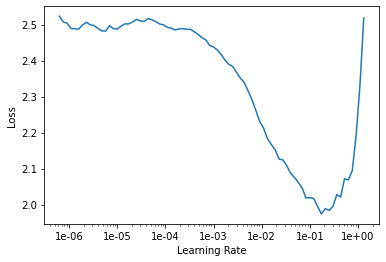

In [113]:
learn_c.recorder.plot()

In [114]:
lr = 2e-1
lr *= bs/48

wd = 0.1

In [115]:
learn_c.fit_one_cycle(2, lr, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,1.929022,2.027725,0.261538,0.231429,00:03
1,1.603572,1.490067,0.530769,0.535735,00:03


In [ ]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

In [116]:
learn_c.fit_one_cycle(2, lr, wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,1.566811,1.705368,0.507692,0.445633,00:03
1,1.389665,1.453216,0.561538,0.565221,00:03


In [ ]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

In [117]:
learn_c.freeze_to(-2)
learn_c.fit_one_cycle(2, slice(lr/(2.6**4),lr), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,1.439053,1.522381,0.600000,0.575764,00:03
1,1.226348,1.405850,0.592308,0.582018,00:03


In [ ]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

In [118]:
learn_c.freeze_to(-3)
learn_c.fit_one_cycle(2, slice(lr/2/(2.6**4),lr/2), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.942706,1.503851,0.576923,0.541183,00:03
1,0.840199,1.443131,0.607692,0.620921,00:03


In [ ]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

In [119]:
learn_c.unfreeze()
learn_c.fit_one_cycle(4, slice(lr/10/(2.6**4),lr/10), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.647921,1.394347,0.669231,0.659260,00:06
1,0.630713,2.318720,0.646154,0.646586,00:06
2,0.605090,2.720127,0.646154,0.632723,00:06
3,0.583503,1.362374,0.653846,0.641709,00:06


In [92]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2') #1 (70)

In [120]:
learn_c.fit_one_cycle(4, slice(lr/100/(2.6**4),lr/100), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.564253,1.593050,0.653846,0.637118,00:06
1,0.561864,1.333224,0.661538,0.642603,00:06
2,0.559788,2.103024,0.653846,0.635765,00:06
3,0.558652,1.336816,0.653846,0.632613,00:06


In [ ]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

In [121]:
#learn_c.load(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')
learn_c.fit_one_cycle(1, slice(lr/1000/(2.6**4),lr/1000), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.557415,1.330847,0.661538,0.644151,00:06


In [122]:
learn_c.fit_one_cycle(1, slice(lr/1000/(2.6**4),lr/1000), wd=wd, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f1,time
0,0.554852,1.381414,0.653846,0.637314,00:06


In [123]:
learn_c.save(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_p15_multifit_bwd_v2')

In [124]:
learn_c.load(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_p15_multifit_bwd_v2');
learn_c.to_fp32().export(f'{lang}_classifier_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2')

### Confusion matrix

In [125]:
%%time
data_clas = load_data(path, f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2', bs=bs, num_workers=1, backwards=True)

config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config)

CPU times: user 521 ms, sys: 130 ms, total: 650 ms
Wall time: 1.01 s


In [126]:
learn_c.load(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_p15_multifit_bwd_v2', purge=False);

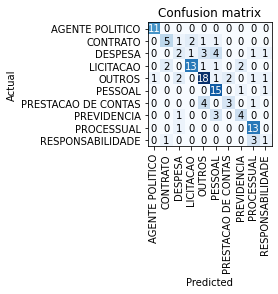

In [127]:
preds,y,losses = learn_c.get_preds(with_loss=True)
predictions = np.argmax(preds, axis = 1)

interp = ClassificationInterpretation(learn_c, preds, y, losses)
interp.plot_confusion_matrix()

In [128]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.array(y), np.array(predictions))
print(cm)

## acc
#print(f'accuracy global: {(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9]+cm[10,10])/(cm.sum())}')
print(f'accuracy global: {(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9])/(cm.sum())}')

# acc neg, acc pos
print(f'accuracy on class 0: {cm[0,0]/(cm.sum(1)[0])*100}') 
print(f'accuracy on class 1: {cm[1,1]/(cm.sum(1)[1])*100}')
print(f'accuracy on class 2: {cm[2,2]/(cm.sum(1)[2])*100}')
print(f'accuracy on class 3: {cm[3,3]/(cm.sum(1)[3])*100}')
print(f'accuracy on class 4: {cm[4,4]/(cm.sum(1)[4])*100}')
print(f'accuracy on class 5: {cm[5,5]/(cm.sum(1)[5])*100}')
print(f'accuracy on class 6: {cm[6,6]/(cm.sum(1)[6])*100}')
print(f'accuracy on class 7: {cm[7,7]/(cm.sum(1)[7])*100}')
print(f'accuracy on class 8: {cm[8,8]/(cm.sum(1)[8])*100}')
print(f'accuracy on class 9: {cm[9,9]/(cm.sum(1)[9])*100}')

[[11  0  0  0 ...  0  0  0  0]
 [ 0  5  1  2 ...  0  0  0  0]
 [ 0  0  2  1 ...  0  0  1  1]
 [ 0  2  0 13 ...  0  2  0  0]
 ...
 [ 0  0  0  0 ...  3  0  1  0]
 [ 0  0  1  0 ...  0  4  0  0]
 [ 0  0  1  0 ...  0  0 13  0]
 [ 0  1  0  0 ...  0  0  3  1]]
accuracy global: 0.6538461538461539
accuracy on class 0: 100.0
accuracy on class 1: 50.0
accuracy on class 2: 16.666666666666664
accuracy on class 3: 68.42105263157895
accuracy on class 4: 69.23076923076923
accuracy on class 5: 88.23529411764706
accuracy on class 6: 37.5
accuracy on class 7: 50.0
accuracy on class 8: 92.85714285714286
accuracy on class 9: 20.0


In [129]:
learn_c.show_results()

text,target,prediction
". ▁extraordinária ▁legislativa ▁sessão ▁a ▁para ▁convocado ▁parlamentar ▁ao tória iza den ▁in ▁natureza ▁de ▁parcela ▁referida ▁da ▁pagamento ▁ao ação ved ▁ ▁expressa se - ▁estabeleceu ▁2006, ▁de , ▁50 ° . n ▁ c ▁e ▁xxup ▁pela , ▁federal ▁xxmaj ▁constituição ▁xxmaj ▁da 57 ▁ . ▁art ▁do o ▁7 § ▁ ▁ao ▁dada ▁redação ▁nova ▁a ▁com ▁xxmaj - ▁ ▁4 ▁redução ▁a jou ense ▁ ▁que",AGENTE POLITICO,AGENTE POLITICO
". ▁social ▁controle ▁e ▁pública ência par ▁trans ▁de ▁instrumento ▁importante ▁desse ▁positiva mente ria ita ▁major ▁avaliação ▁uma ▁demonstra ▁que ▁mas , ▁imediato paro ▁re ▁merece ▁que riedade prop ▁im , s tório fa tis sa ▁in ▁considerados ▁foram ▁itens ▁4 ▁apenas ▁2016, ▁/ 02 ▁ ▁no ce t ▁ ▁xxup tiva ▁norma ▁xxmaj ▁instrução ▁xxmaj ▁da ▁i ▁anexo ▁o ▁conforme dos ▁analisa ▁itens ▁os ▁todos ▁dentre , ência",OUTROS,OUTROS
"). ▁2018 ▁/ 2 93 ▁1. dão ór ac ▁( ▁2017 ▁/ 05 ▁ ▁no ▁preços ▁xxmaj ▁de ▁tomada ▁xxmaj ▁na s ▁falha ▁às ▁relação ▁em , nte ▁procede da ▁julga ▁foi da pensa ▁a ▁denúncia ▁a . ▁5 . ▁falha ▁a ▁parcialmente ando ▁san , ▁apresentada ▁foi ▁defesa ▁de ▁sede ▁em , ▁entretanto , ▁qual ▁a , ▁fiscalização ▁da ▁quando da ▁solicita l ▁documenta ção ▁comprova ▁na s ▁falha",CONTRATO,CONTRATO
"▁especial s ▁conta ▁de ▁tomada ▁de ▁processo ▁do ▁resultado ▁do ▁quando s ▁aplicada ▁melhores ▁serão ▁que , ▁jurídica ▁personalidade ▁da ção considera s ▁de ▁a ▁e ▁empresa ▁da ▁parte ▁por idade ne ido ▁in ▁de ▁declaração ▁a , ▁prefeito ▁ao ▁e ção cita ▁li ▁de ▁comissão ▁da ▁membros ▁ao ▁pública ▁administração ▁na ▁confiança ▁de ▁função ▁ou ▁comissão ▁em ▁cargo ▁de ▁exercício ▁o ▁para tação bili ina ▁ ▁a , ▁empresa",CONTRATO,LICITACAO
". nte flutua ▁ ▁xxmaj ▁dívida ▁xxmaj ▁da ▁demonstração ▁xxmaj ▁e iais mon patri ▁ ▁xxmaj ▁variações ▁xxmaj ▁das ▁demonstração ▁xxmaj ▁na ▁e al moni patri ▁ ▁xxmaj , ▁financeiro ▁xxmaj , o mentári ça r ▁o ▁xxmaj s ▁balanço ▁xxmaj ▁dos ▁análise ▁na s ência ist s ▁incon ▁xxmaj ; s ▁balanço ▁dos ▁resultado ▁do ção pura ▁a ▁na m ▁influencia ▁quais ▁as nais patro ▁ ções ▁obriga ▁das",OUTROS,OUTROS


### Predictions some random sentences

In [ ]:
# Get the prediction
test_text = "A medida cautelar do TCE que determina a suspensão de licitação por falhas no edital não impede o órgão ou a entidade de rever seu ato convocatório, valendo-se do poder de autotutela (art. 49 da Lei 8.666/1993 c/c o art. 9º da Lei 10.520/2002) , com o objetivo de, antecipando-se a eventual deliberação do Tribunal, promover de modo próprio a anulação da licitação e o refazimento do edital, livre dos vícios apontados."
pred = learn_c.predict(test_text)
print(pred)

(Category tensor(3), tensor(3), tensor([0.0091, 0.0094, 0.0059, 0.7773, 0.0453, 0.0104, 0.0448, 0.0201, 0.0477,
        0.0299]))


In [ ]:
# The darker the word-shading in the below example, the more it contributes to the classification. 
txt_ci = TextClassificationInterpretation.from_learner(learn_c)
txt_ci.show_intrinsic_attention(test_text,cmap=plt.cm.Purples)

In [ ]:
txt_ci.intrinsic_attention(test_text)[1]

tensor([0.0604, 0.0725, 0.1687, 0.0380, 0.0624, 0.0577, 0.0967, 0.3318, 0.0716,
        0.1169, 0.0526, 0.0394, 0.0461, 0.1572, 0.4235, 0.3011, 0.1078, 0.0540,
        0.0555, 0.0544, 0.0870, 0.0693, 0.1043, 0.2296, 0.0921, 0.0991, 0.3246,
        0.1866, 0.0636, 0.1507, 0.1008, 0.2551, 0.0749, 0.0367, 0.0863, 0.1828,
        0.1058, 0.1844, 0.0551, 0.0632, 0.0289, 0.0753, 0.1537, 0.0677, 0.1192,
        0.2986, 0.0503, 0.0472, 0.0627, 0.0792, 0.3154, 1.0000, 0.1079, 0.1787,
        0.0421, 0.0483, 0.0451, 0.0194, 0.0147, 0.0180, 0.0335, 0.0604, 0.0149,
        0.0328, 0.0574, 0.0810, 0.0318, 0.0749, 0.1459, 0.0435, 0.0870, 0.0763,
        0.0457, 0.0307, 0.0289, 0.0160, 0.0473, 0.1523, 0.0204, 0.0427, 0.0966,
        0.1089, 0.2580, 0.1483, 0.1337, 0.0873, 0.0628, 0.1055, 0.0323, 0.0532,
        0.0200, 0.0637, 0.1305, 0.0430, 0.1218, 0.2995, 0.1101, 0.1669, 0.4869,
        0.0707, 0.1777, 0.0443, 0.0577, 0.0858, 0.0886, 0.2283, 0.1029, 0.1470,
        0.1019, 0.1136, 0.0541, 0.0529, 

In [ ]:
# tabulation showing the first k texts in top_losses along with their prediction, actual,loss, and probability of actual class.
# max_len is the maximum number of tokens displayed. If max_len=None, it will display all tokens.
txt_ci.show_top_losses(5)

Text,Prediction,Actual,Loss,Probability
▁xxbos ▁xxup ▁não ▁xxup ▁pagamento ▁xxup ▁de ▁xxup ▁verba s ▁xxup ▁trabalhista s ▁e ▁xxup ▁pre vide nci árias . ▁xxup ▁servidor a ▁xxup ▁municipal . ▁xxup ▁ vin cula ção ▁a ▁xxup ▁empresa ▁xxup ▁ter ce ir izada . ▁xxup ▁competência ▁xxup ▁do ▁xxup ▁ministério ▁xxup ▁público ▁xxup ▁do ▁xxup ▁trabalho ▁e ▁xxup ▁da ▁xxup ▁justiça ▁xxup ▁do ▁xxup ▁trabalho . ▁xxmaj ▁os ▁xxmaj ▁tribunais ▁de ▁xxmaj ▁conta s,RESPONSABILIDADE,PESSOAL,4.99,0.01
"▁xxbos ▁xxup ▁de spe sa . ▁xxup ▁não ▁xxup ▁per tin ente ▁a ▁xxup ▁função ▁xxup ▁saúde . ▁xxmaj ▁no ▁toca nte ▁aos ▁serviços ▁con tá bei s , ▁tais ▁despesas ▁são ▁consideradas ▁administrativa s ▁que ▁não ▁estão ▁relacionadas ▁à ▁promoção , ▁proteção , ▁recuperação ▁e ▁reabilitação ▁da ▁saúde ▁( art . ▁7 o , ▁da ▁xxmaj ▁portaria ▁no ▁2. 0 47 ▁/ ▁ 02 ), ▁não ▁podendo , ▁portanto",OUTROS,DESPESA,4.88,0.01
"▁xxbos ▁xxup ▁tomada ▁xxup ▁de ▁xxup ▁conta s ▁xxup ▁especial . ▁xxup ▁de spe sa . ▁xxup ▁existência ▁xxup ▁de ▁xxup ▁da no ▁xxup ▁ao ▁xxup ▁e r ário ▁xxup ▁na ▁xxup ▁obra ▁xxup ▁da ▁xxup ▁construção ▁xxup ▁de ▁xxup ▁uma ▁xxup ▁passar ela ▁xxup ▁sobre ▁o ▁xxup ▁rio ▁xxup ▁can u dos ▁ - ▁xxup ▁pi go ita , ▁xxup ▁no ▁xxup ▁município ▁xxup ▁de ▁xxup ▁novo ▁xxup ▁santo",LICITACAO,DESPESA,4.52,0.01
▁xxbos ▁xxup ▁e menta : ▁xxup ▁presta ção ▁xxup ▁de ▁xxup ▁conta s . ▁xxup ▁li cita ção . ▁xxup ▁permissão . ▁xxup ▁o fen sa ▁à ▁xxup ▁lei ▁xxup ▁de ▁xxup ▁li cita ções . ▁xxup ▁regular idades ▁xxup ▁com ▁xxup ▁ res s alva s . ▁1. ▁xxmaj ▁per missões ▁outorga das ▁por ▁prazo ▁in determin ado ▁é ▁expressa mente ▁proibido ▁por ▁lei ▁de ▁acordo ▁com ▁o ▁art,LICITACAO,CONTRATO,4.21,0.01
▁xxbos ▁xxup ▁e menta . ▁xxup ▁contrato ▁xxup ▁administrativo . ▁xxup ▁fiscalização . ▁xxup ▁de ▁xxup ▁obras . ▁xxup ▁reforma ▁xxup ▁de ▁xxup ▁unidade ▁xxup ▁básica ▁xxup ▁de ▁xxup ▁saúde . ▁xxup ▁orçamento ▁xxup ▁de ▁xxup ▁re fer ên ncia ▁xxup ▁in completo . ▁xxup ▁pagamento ▁xxup ▁da ▁1 a ▁xxup ▁medição ▁xxup ▁sem ▁o ▁xxup ▁a tes te ▁xxup ▁do ▁xxup ▁responsável ▁xxup ▁pela ▁xxup ▁fiscalização ▁xxup ▁do ▁xxup,CONTRATO,LICITACAO,4.14,0.02


## Ensemble

In [16]:
bs = 18

In [17]:
config = awd_lstm_clas_config.copy()
config['qrnn'] = True
config['n_hid'] = 1550 #default 1152
config['n_layers'] = 4 #default 3

In [18]:
data_clas = load_data(path, f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2', bs=bs, num_workers=1)
learn_c = text_classifier_learner(data_clas, AWD_LSTM, config=config, drop_mult=0.3, metrics=[accuracy,f1]).to_fp16()
learn_c.load(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_v2', purge=False);

In [19]:
preds,targs = learn_c.get_preds(ordered=True)
accuracy(preds,targs),f1(preds,targs)

(tensor(0.6692), tensor(0.6512))

In [21]:
learn_c.data.classes

['AGENTE POLITICO',
 'CONTRATO',
 'DESPESA',
 'LICITACAO',
 'OUTROS',
 'PESSOAL',
 'PRESTACAO DE CONTAS',
 'PREVIDENCIA',
 'PROCESSUAL',
 'RESPONSABILIDADE']

In [25]:
print("\nRelatório de Classificação (Forward):\n", \
      classification_report(targs,np.argmax(preds, axis = 1), digits=4, target_names = learn_c.data.classes))


Relatório de Classificação (Forward):
                      precision    recall  f1-score   support

    AGENTE POLITICO     0.8333    0.9091    0.8696        11
           CONTRATO     0.6250    0.5000    0.5556        10
            DESPESA     0.2857    0.1667    0.2105        12
          LICITACAO     0.7500    0.7895    0.7692        19
             OUTROS     0.6562    0.8077    0.7241        26
            PESSOAL     0.7000    0.8235    0.7568        17
PRESTACAO DE CONTAS     0.5000    0.3750    0.4286         8
        PREVIDENCIA     0.6667    0.5000    0.5714         8
         PROCESSUAL     0.8000    0.8571    0.8276        14
   RESPONSABILIDADE     0.2500    0.2000    0.2222         5

           accuracy                         0.6692       130
          macro avg     0.6067    0.5929    0.5936       130
       weighted avg     0.6449    0.6692    0.6512       130



In [27]:
data_clas_bwd = load_data(path, f'{lang}_textlist_class_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2', bs=bs, num_workers=1, backwards=True)
learn_c_bwd = text_classifier_learner(data_clas_bwd, AWD_LSTM, config=config, drop_mult=0.3, metrics=[accuracy,f1]).to_fp16()
learn_c_bwd.load(f'{lang}clas_tcepi_decisoes_pareceres_e_acordaos_sp15_multifit_bwd_v2', purge=False);

In [28]:
preds_b,targs_b = learn_c_bwd.get_preds(ordered=True)
accuracy(preds_b,targs_b),f1(preds_b,targs_b)

(tensor(0.7000), tensor(0.6896))

In [29]:
print("\nRelatório de Classificação (Backward):\n", \
      classification_report(targs_b,np.argmax(preds_b, axis = 1), digits=4, target_names = learn_c_bwd.data.classes))


Relatório de Classificação (Backward):
                      precision    recall  f1-score   support

    AGENTE POLITICO     0.8462    1.0000    0.9167        11
           CONTRATO     0.5714    0.4000    0.4706        10
            DESPESA     0.3333    0.4167    0.3704        12
          LICITACAO     0.7500    0.7895    0.7692        19
             OUTROS     0.7083    0.6538    0.6800        26
            PESSOAL     0.8333    0.8824    0.8571        17
PRESTACAO DE CONTAS     0.7500    0.3750    0.5000         8
        PREVIDENCIA     0.6667    0.7500    0.7059         8
         PROCESSUAL     0.8235    1.0000    0.9032        14
   RESPONSABILIDADE     0.3333    0.2000    0.2500         5

           accuracy                         0.7000       130
          macro avg     0.6616    0.6467    0.6423       130
       weighted avg     0.6953    0.7000    0.6896       130



In [31]:
preds_avg = (preds+preds_b)/2

In [32]:
accuracy(preds_avg,targs_b),f1(preds_avg,targs_b)

(tensor(0.7308), tensor(0.7165))

In [33]:
print("\nRelatório de Classificação (Ensemble):\n", \
      classification_report(targs,np.argmax(preds_avg, axis = 1), digits=4, target_names = learn_c.data.classes))


Relatório de Classificação (Ensemble):
                      precision    recall  f1-score   support

    AGENTE POLITICO     0.7857    1.0000    0.8800        11
           CONTRATO     0.5714    0.4000    0.4706        10
            DESPESA     0.4615    0.5000    0.4800        12
          LICITACAO     0.7619    0.8421    0.8000        19
             OUTROS     0.7407    0.7692    0.7547        26
            PESSOAL     0.8333    0.8824    0.8571        17
PRESTACAO DE CONTAS     0.7500    0.3750    0.5000         8
        PREVIDENCIA     0.8333    0.6250    0.7143         8
         PROCESSUAL     0.8235    1.0000    0.9032        14
   RESPONSABILIDADE     0.3333    0.2000    0.2500         5

           accuracy                         0.7308       130
          macro avg     0.6895    0.6594    0.6610       130
       weighted avg     0.7205    0.7308    0.7165       130



In [25]:
from sklearn.metrics import confusion_matrix

predictions = np.argmax(preds_avg, axis = 1)
cm = confusion_matrix(np.array(targs_b), np.array(predictions))
print(cm)

## acc
#print(f'accuracy global: {(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9]+cm[10,10])/(cm.sum())}')
print(f'accuracy global: {(cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4]+cm[5,5]+cm[6,6]+cm[7,7]+cm[8,8]+cm[9,9])/(cm.sum())}')

# acc neg, acc pos
print(f'accuracy on class 0: {cm[0,0]/(cm.sum(1)[0])*100}') 
print(f'accuracy on class 1: {cm[1,1]/(cm.sum(1)[1])*100}')
print(f'accuracy on class 2: {cm[2,2]/(cm.sum(1)[2])*100}')
print(f'accuracy on class 3: {cm[3,3]/(cm.sum(1)[3])*100}')
print(f'accuracy on class 4: {cm[4,4]/(cm.sum(1)[4])*100}')
print(f'accuracy on class 5: {cm[5,5]/(cm.sum(1)[5])*100}')
print(f'accuracy on class 6: {cm[6,6]/(cm.sum(1)[6])*100}')
print(f'accuracy on class 7: {cm[7,7]/(cm.sum(1)[7])*100}')
print(f'accuracy on class 8: {cm[8,8]/(cm.sum(1)[8])*100}')
print(f'accuracy on class 9: {cm[9,9]/(cm.sum(1)[9])*100}')
#print(f'accuracy on class 10: {cm[10,10]/(cm.sum(1)[10])*100}')

[[11  0  0  0 ...  0  0  0  0]
 [ 2  4  1  3 ...  0  0  0  0]
 [ 0  0  6  1 ...  0  0  1  0]
 [ 0  1  2 16 ...  0  0  0  0]
 ...
 [ 0  0  1  0 ...  3  0  0  0]
 [ 0  0  1  0 ...  0  5  0  0]
 [ 0  0  0  0 ...  0  0 14  0]
 [ 0  2  0  0 ...  0  1  1  1]]
accuracy global: 0.7307692307692307
accuracy on class 0: 100.0
accuracy on class 1: 40.0
accuracy on class 2: 50.0
accuracy on class 3: 84.21052631578947
accuracy on class 4: 76.92307692307693
accuracy on class 5: 88.23529411764706
accuracy on class 6: 37.5
accuracy on class 7: 62.5
accuracy on class 8: 100.0
accuracy on class 9: 20.0


In [36]:
predictions

tensor([4, 4, 2, 8, 0, 3, 5, 1, 3, 4, 3, 4, 3, 2, 3, 5, 4, 4, 0, 4, 0, 0, 9, 0,
        3, 2, 8, 5, 4, 9, 2, 0, 6, 2, 3, 8, 3, 8, 8, 6, 4, 2, 8, 7, 3, 4, 4, 4,
        1, 3, 4, 7, 3, 5, 8, 3, 4, 4, 0, 4, 7, 8, 5, 3, 5, 5, 5, 9, 4, 8, 0, 5,
        0, 4, 5, 7, 8, 4, 4, 4, 4, 4, 5, 8, 4, 2, 5, 2, 3, 4, 3, 1, 1, 3, 5, 0,
        4, 2, 8, 0, 8, 1, 1, 3, 0, 8, 5, 7, 3, 6, 7, 3, 0, 5, 8, 2, 2, 0, 3, 8,
        5, 3, 2, 1, 4, 5, 5, 2, 6, 8])

In [66]:
print('Acurácia %4f' % accuracy_score(predictions, targs_b))
print('Precisão %4f' % precision_score(targs_b,predictions, average='weighted'))
print('Recall %4f' % recall_score(targs_b,predictions, average='weighted'))
print('F1-Score %4f' % f1_score(targs_b, predictions, average="weighted"))

Acurácia 0.730769
Precisão 0.720465
Recall 0.730769
F1-Score 0.716534


In [71]:
def score_df(model_type, y_test, y_pred, average='weighted'):
    model_type_list, ac_score_list, p_score_list, r_score_list, f1_score_list = [], [], [], [], []

    model_type_list.append(model_type)
    ac_score_list.append(accuracy_score(y_test, y_pred))
    p_score_list.append(precision_score(y_test, y_pred, average=average))
    r_score_list.append(recall_score(y_test, y_pred, average=average))
    f1_score_list.append(f1_score(y_test, y_pred, average=average))
    
    df = pd.DataFrame([model_type_list, ac_score_list, p_score_list, r_score_list, f1_score_list]).T
    df.columns = ['model_type', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score']
    return df

In [72]:
metrics_df = \
    pd.DataFrame(columns= ['model_type', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score'])

metrics_df = metrics_df.append(score_df('Forward', targs, np.argmax(preds, axis = 1)), ignore_index=True)
metrics_df = metrics_df.append(score_df('Backward', targs_b, np.argmax(preds_b, axis = 1)), ignore_index=True)
metrics_df = metrics_df.append(score_df('Ensemble', targs_b, predictions), ignore_index=True)

metrics_df = metrics_df.sort_values(by='f1_score', ascending=False)
metrics_df

,model_type,accuracy_score,precision_score,recall_score,f1_score
2,Ensemble,0.730769,0.720465,0.730769,0.716534
1,Backward,0.7,0.695267,0.7,0.689559
0,Forward,0.669231,0.644931,0.669231,0.651171


Matriz de confusão (forward):


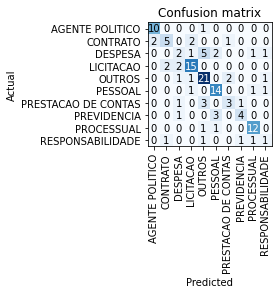

In [64]:
print('Matriz de confusão (forward):')
ClassificationInterpretation.from_learner(learn_c).plot_confusion_matrix()

Matriz de confusão (backward):


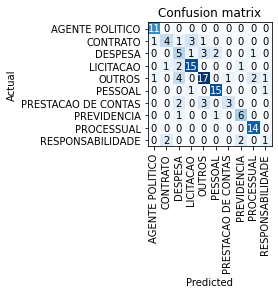

In [65]:
print('Matriz de confusão (backward):')
ClassificationInterpretation.from_learner(learn_c_bwd).plot_confusion_matrix()